# Project 3: Predicting Used Car Sale Price Using Feedforward Artificial Neural Networks

### 3.2 Importing Libraries

In [785]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import tensorflow as tf
print(tf.__version__)
# Must be using tensorflow 2.0 or greater

2.14.0


### 3.3 Importing the Dataset

In [786]:
data_path = r'Data/train-data.csv'
car_dataset = pd.read_csv(data_path, engine = 'python')
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Prints the first 5 rows of the dataset to understand the structure of the dataset.

### 3.4 Data Visualization and Preprocessing

In [787]:
car_dataset.isnull().mean()

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

This shows all the percentages of missing values in the dataset by column. The column with the highest percentage of missing values is New Price.

In [788]:
car_dataset = car_dataset.drop(['Unnamed: 0', 'New_Price'], axis = 1)
temp_car_dataset = car_dataset.drop(["Name","Location",'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power',], axis = 1)

<Axes: >

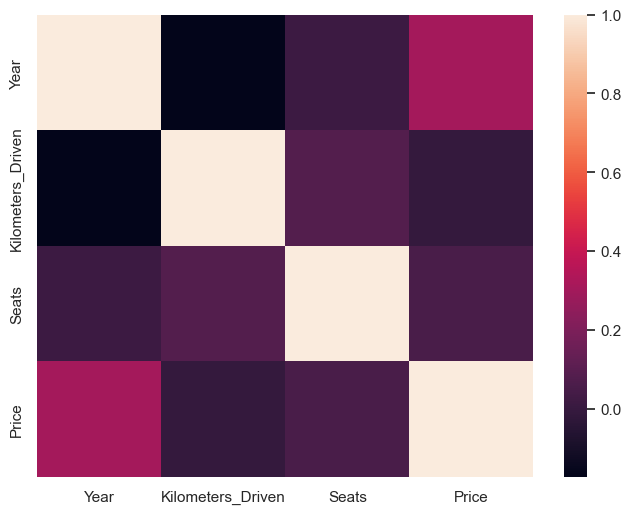

In [789]:
plt.rcParams["figure.figsize"] = [8 , 6]
sns.heatmap(temp_car_dataset.corr())

This makes a heat map with all the numerical characteristics of the cars to see the correlation between the numerical characteristics.

C:\Users\carte\AppData\Local\Temp\ipykernel_25960\966728332.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_dataset['Price'])


<Axes: xlabel='Price', ylabel='Density'>

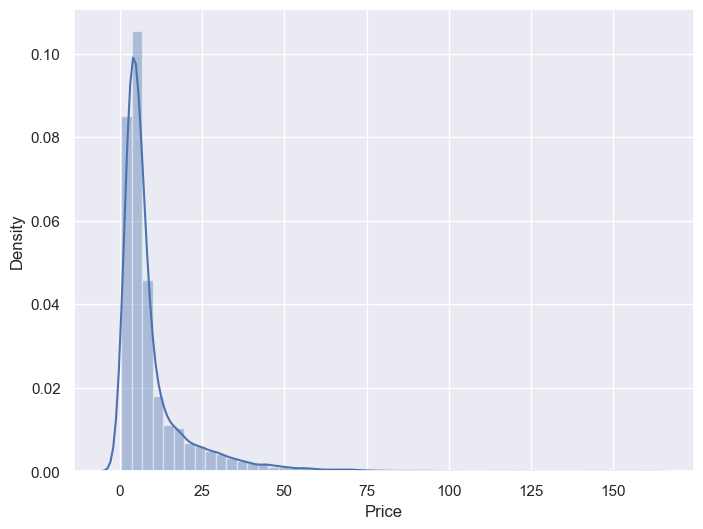

In [790]:
sns.distplot(car_dataset['Price'])

### 3.5 Converting Categorical Columns to Numerical

In [791]:
car_dataset.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

The amount of unique values in each category are printed.

In [792]:
print(car_dataset.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


Prints the data type of each category.

In [793]:
numerical_data = car_dataset.drop(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power'], axis = 1)
numerical_data.head()

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


This gets rid of all the of the non-numerical values.

In [794]:
categorical_data = car_dataset.filter(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power'], axis = 1)
categorical_data.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp


This print the categorical data removing the numerical values.

In [795]:
categorical_data__one_hot = pd.get_dummies(categorical_data, drop_first= 1, dtype = 'int')
categorical_data__one_hot.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This allows us to create a numerical value for each categorical data point by creating true or false values which can be interpreted as 1 or 0.

In [796]:
complete_dataset = pd.concat([numerical_data, categorical_data__one_hot ], axis=1)
complete_dataset.head()

,Year,Kilometers_Driven,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,2010,72000,5.0,1.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This concatenates the numerical columns with one-hot encoded columns to create a final dataset.

In [797]:
complete_dataset.isnull().mean()

Year                  0.000000
Kilometers_Driven     0.000000
Seats                 0.006978
Price                 0.000000
Location_Bangalore    0.000000
                        ...   
Power_98.82 bhp       0.000000
Power_98.96 bhp       0.000000
Power_99 bhp          0.000000
Power_99.6 bhp        0.000000
Power_null bhp        0.000000
Length: 979, dtype: float64

This checks for null values in the dataset.

In [798]:
complete_dataset.dropna(inplace = True)

This removes the rows that contain null values.

### 3.6 Splitting the Dataset into Training and Testing Sets

In [799]:
X = complete_dataset.drop('Price', axis = 1)
y = complete_dataset['Price']

In [800]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [801]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3.7 Creating and Training the Feedforward Artificial Neural Network with Tensor Flow Keras

In [802]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [803]:
input_layer = Input(shape=(X_train.shape[1],))
dense_layer0 = Dense(100, activation='relu')(input_layer)
dense_layer1 = Dense(50, activation='relu')(dense_layer0)
dense_layer2 = Dense(25, activation='relu')(dense_layer1)
dense_layer3 = Dense(10, activation='relu')(dense_layer2)
dense_layer4 = Dense(5, activation='relu')(dense_layer3)
dense_layer5 = Dense(2, activation='relu')(dense_layer4)
output = Dense(1)(dense_layer5)

In [804]:
model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [805]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [806]:
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5


765/765 [==============================] - 2s 1ms/step - loss: 220.4162 - mean_squared_error: 220.4162 - val_loss: 182.2145 - val_mean_squared_error: 182.2145
Epoch 2/5
765/765 [==============================] - 1s 1ms/step - loss: 65.9620 - mean_squared_error: 65.9620 - val_loss: 24.1192 - val_mean_squared_error: 24.1192
Epoch 3/5
765/765 [==============================] - 1s 1ms/step - loss: 24.3463 - mean_squared_error: 24.3463 - val_loss: 28.0019 - val_mean_squared_error: 28.0019
Epoch 4/5
765/765 [==============================] - 1s 1ms/step - loss: 12.7529 - mean_squared_error: 12.7529 - val_loss: 33.5165 - val_mean_squared_error: 33.5165
Epoch 5/5
765/765 [==============================] - 1s 1ms/step - loss: 10.2429 - mean_squared_error: 10.2429 - val_loss: 57.2228 - val_mean_squared_error: 57.2228


### 3.8 Evaluating the Performance of the Feedforward Artificial Neural Network

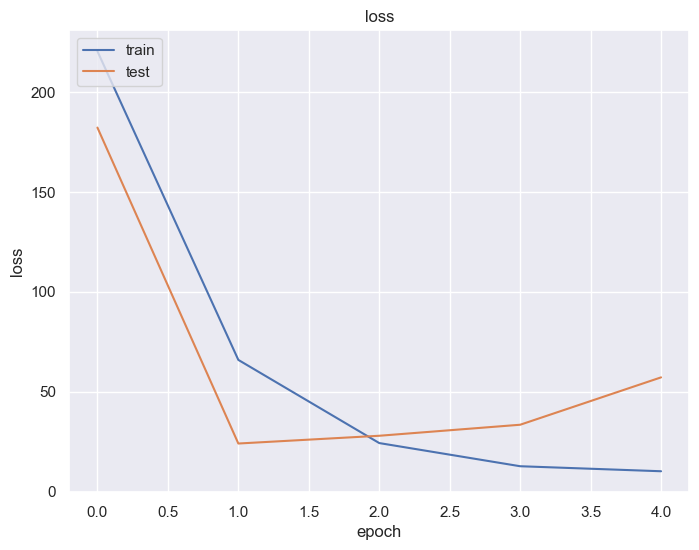

In [807]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [808]:
y_pred = model.predict(X_test)

38/38 [==============================] - 0s 866us/step


In [809]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.117940059222505
Mean Squared Error: 21.347910926762143
Root Mean Squared Error: 4.620379954804815


In [810]:
car_dataset['Price'].mean()

9.47946835022429

In [811]:
comparison_df = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()})
comparison_df

,Actual,Predicted
0,8.25,[8.721019744873047]
1,5.08,[5.045334815979004]
2,4.50,[7.740731239318848]
3,28.50,[41.26080322265625]
4,7.25,[10.160320281982422]
...,...,...
1191,7.50,[9.337183952331543]
1192,21.67,[23.43716812133789]
1193,4.60,[4.561877250671387]
1194,8.00,[7.959773063659668]


### 3.9 Making Predictions on a Single Data Point

In [812]:
X_test[1].shape

(978,)

This prints the shape of the feature vector.

In [813]:
single_point = X_test[1].reshape(1, -1)
single_point.shape

(1, 978)

This converts its from a feature vector to a row vector.

In [814]:
model.predict(X_test[1].reshape(1, -1))

1/1 [==============================] - 0s 13ms/step


array([[5.045335]], dtype=float32)

The predicted price is printed in this array.

In [815]:
y_test.values[1]

5.08

This prints the actual price of the car.